# OCR Demo

## What is OCR?

## Example

In [1]:
from scripts import ocr, utils
from scripts.predict import predict
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2


# Image --> Detected Price Tag
model = utils.load_model_run(run_id=4)

img = r"C:\Users\janek\notebooks\petrol-prices-object-detection\custom_data/roboflow/dataset-v2/train/images/IMG_20230606_194813_jpg.rf.bf34865c4fccd8accfa7d9080b9e3f3b.jpg"
result = predict(img, model)[0]

# Detected Price Tag --> Cropped Bounding Box
class_name_to_box = ocr.get_cropped_bboxes(result, verbose=False)

price_tags = class_name_to_box[2]  # 2 is the idx for 'price tag' class



image 1/1 C:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\roboflow\dataset-v2\train\images\IMG_20230606_194813_jpg.rf.bf34865c4fccd8accfa7d9080b9e3f3b.jpg: 640x640 2 orlens, 1 prices, 14.0ms
Speed: 4.0ms preprocess, 14.0ms inference, 10.7ms postprocess per image at shape (1, 3, 640, 640)


In [2]:
# Save image as .jpg
from scripts.utils import save_image

path=r'C:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\box.jpg'
save_image(price_tags[0], file_path=path)

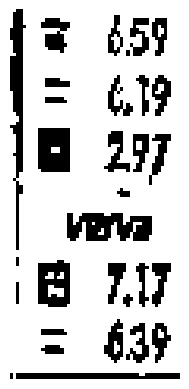

In [3]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = (
    r"C:\Program Files\Tesseract-OCR\tesseract.exe"
)

for tag in price_tags:
    ocr_result = ocr.perform_ocr(image_array=tag)
    
    # Show OCR result
    print(ocr_result)

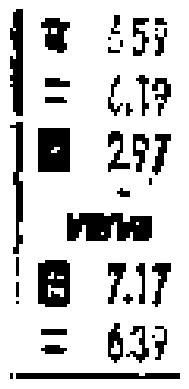

''

In [4]:
from scripts import ocr
import cv2

path=r'C:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\box.jpg'
ocr_result = ocr.perform_ocr(image_array=cv2.imread(path))

# Show OCR result
print(ocr_result)
ocr_result

**Idea:** Train a model for recognizing the exact localization of the prices, not only the whole price tag.

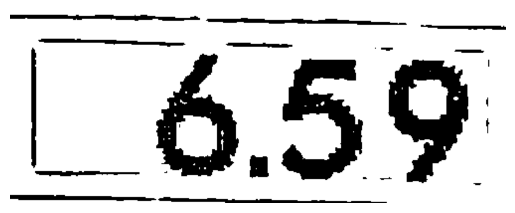

''

In [5]:
cropped_price = r'C:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\price-example.png'
ocr_result = ocr.perform_ocr(image_array=cv2.imread(cropped_price))
ocr_result

In [6]:
import pytesseract
pytesseract.image_to_boxes(cropped_price)

'~ 0 0 1723 660 0\n'

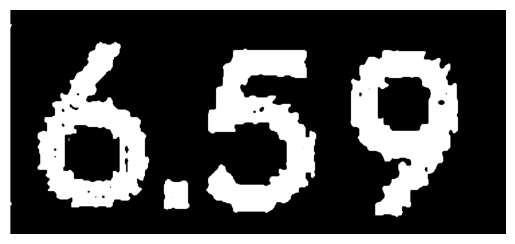

''

In [8]:
cropped_price = r'C:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\cleaned.png'
ocr_result = ocr.perform_ocr(image_array=cv2.imread(cropped_price))
ocr_result

In [9]:
pytesseract.image_to_boxes(cropped_price)

'~ 69 41 1190 510 0\n'